Spotify Music Analysis

In [1]:
#Data Set - Spotify 2010 - 2019 Top 100 Songs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#from pandas.plotting import autocorrelation_plot
#import seaborn as sns
#from pandas.plotting import scatter_matrix
#from pandas.plotting import autocorrelation_plot
#from pandas.plotting import parallel_coordinates
#from pandas.plotting import lag_plot

In [2]:
df = pd.read_csv("Spotify 2010 - 2019 Top 100.csv")

In [3]:
df.columns

Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   artist         1000 non-null   object
 2   top genre      1000 non-null   object
 3   year released  1000 non-null   int64 
 4   added          1000 non-null   object
 5   bpm            1000 non-null   int64 
 6   nrgy           1000 non-null   int64 
 7   dnce           1000 non-null   int64 
 8   dB             1000 non-null   int64 
 9   live           1000 non-null   int64 
 10  val            1000 non-null   int64 
 11  dur            1000 non-null   int64 
 12  acous          1000 non-null   int64 
 13  spch           1000 non-null   int64 
 14  pop            1000 non-null   int64 
 15  top year       1000 non-null   int64 
 16  artist type    1000 non-null   object
dtypes: int64(12), object(5)
memory usage: 132.9+ KB


In [5]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [6]:
df.isnull().sum()

title            0
artist           0
top genre        0
year released    0
added            0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
pop              0
top year         0
artist type      0
dtype: int64

In [7]:
df = df.drop(columns=['added'])
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo


In [8]:
df["top genre"].value_counts() # 132 top genres for categories 

dance pop           361
pop                  57
atl hip hop          39
art pop              37
hip hop              21
                   ... 
french shoegaze       1
new french touch      1
hip pop               1
australian psych      1
uk drill              1
Name: top genre, Length: 132, dtype: int64

In [9]:
#Use encoder to create values for the Categories in Top Genre
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df['genre_cat']= ""
df['genre_cat'] = ord_enc.fit_transform(df[["top genre"]])
df[['top genre', 'genre_cat']].head()


,top genre,genre_cat
0,dance pop,51.0
1,dance pop,51.0
2,pop soul,122.0
3,atl hip hop,14.0
4,atl hip hop,14.0


In [10]:
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,genre_cat
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo,51.0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo,51.0
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo,122.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo,14.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,155,73,83,-4,12,45,313,1,22,86,2019,Solo,85.0
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo,85.0
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo,83.0
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo,4.0


In [11]:
#Use encoder to create values for the Categories in Artist type

ord_enc = OrdinalEncoder()
df['artist_cat']= ""
df['artist_cat'] = ord_enc.fit_transform(df[["artist type"]])
df[['artist type', 'artist_cat']].head()

,artist type,artist_cat
0,Duo,1.0
1,Duo,1.0
2,Solo,2.0
3,Solo,2.0
4,Solo,2.0


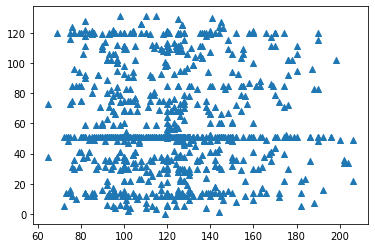

In [12]:
plt.scatter(df.bpm ,df.genre_cat,marker="^")
plt.show()

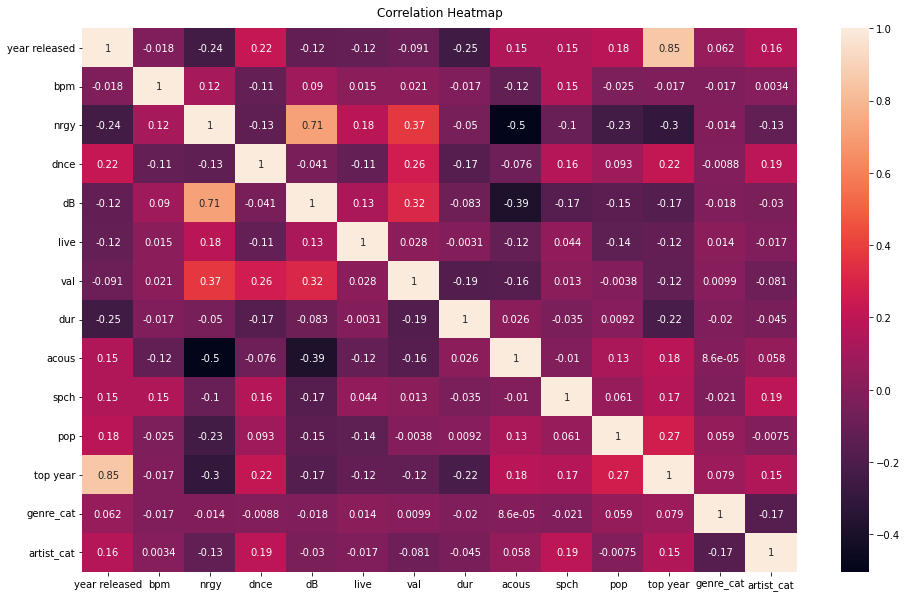

In [13]:
import seaborn as sns

plt.figure(figsize=(16,10))

corr_heat = sns.heatmap(df.corr(), annot=True)
corr_heat.set_title("Correlation Heatmap", pad=12);
plt.show()

There is a high correlation between genre and top year. This implies that certain genres are popular in a specific year.

# Recommendation System using K-means Clustering

In [14]:
# Drop song duplicates
def drop_duplicates(df):
    df['artists_songs'] = df.apply(lambda row: row['artist'] + row['title'], axis = 1)
    return df.drop_duplicates('artists_songs')

In [15]:
df = df.drop_duplicates(subset='title')
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,genre_cat,artist_cat
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo,51.0,1.0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo,51.0,1.0
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo,122.0,2.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo,14.0,2.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,You Need To Calm Down,Taylor Swift,pop,2019,85,67,77,-6,6,71,171,1,6,81,2019,Solo,120.0,2.0
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo,85.0,2.0
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo,83.0,2.0
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo,4.0,1.0


In [16]:
df_subset = df[['title', 'artist', 'top genre', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'acous', 'spch', 'pop']]
df_subset

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,140,81,61,-6,23,23,0,6,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,138,89,68,-4,36,83,1,8,68
2,I Need A Dollar,Aloe Blacc,pop soul,95,48,84,-7,9,96,20,3,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,93,87,66,-4,4,38,11,12,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,104,85,69,-6,9,74,39,5,79
...,...,...,...,...,...,...,...,...,...,...,...,...
994,You Need To Calm Down,Taylor Swift,pop,85,67,77,-6,6,71,1,6,81
996,EARFQUAKE,"Tyler, The Creator",hip hop,80,50,55,-9,80,41,23,7,85
997,Boasty (feat. Idris Elba),Wiley,grime,103,77,89,-5,9,46,1,7,68
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,138,58,53,-6,10,59,1,10,67


In [17]:
import copy
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [18]:
df1=copy.deepcopy(df_subset)
df1.drop(columns=['title','artist','top genre', 'pop', 'spch'],inplace=True)
df1

,bpm,nrgy,dnce,dB,live,val,acous
0,140,81,61,-6,23,23,0
1,138,89,68,-4,36,83,1
2,95,48,84,-7,9,96,20
3,93,87,66,-4,4,38,11
4,104,85,69,-6,9,74,39
...,...,...,...,...,...,...,...
994,85,67,77,-6,6,71,1
996,80,50,55,-9,80,41,23
997,103,77,89,-5,9,46,1
998,138,58,53,-6,10,59,1


In [19]:
from sklearn.preprocessing import MinMaxScaler

d_types = ['int16','int32', 'int64', 'float16', 'float32', 'float64']
normalize = df1.select_dtypes(include=d_types)

# Define Min-Max Scaler
scaler = MinMaxScaler()
# Transform data
normalize = scaler.fit_transform(normalize)

print(normalize)

[[0.53191489 0.81521739 0.54545455 ... 0.25925926 0.20430108 0.        ]
 [0.5177305  0.90217391 0.63636364 ... 0.41975309 0.84946237 0.01020408]
 [0.21276596 0.45652174 0.84415584 ... 0.08641975 0.98924731 0.20408163]
 ...
 [0.26950355 0.77173913 0.90909091 ... 0.08641975 0.4516129  0.01020408]
 [0.5177305  0.56521739 0.44155844 ... 0.09876543 0.59139785 0.01020408]
 [0.23404255 0.57608696 0.79220779 ... 0.13580247 0.15053763 0.02040816]]


In [62]:
from sklearn.model_selection import GridSearchCV, GroupKFold

rand_seed = random.seed(42)
kmeans = KMeans(init='k-means++', max_iter=100, n_init=10)
params = {"n_clusters": list(range(2, 96)),}
#groups = np.random.randint(0, 10, len(normalize))

grid_clf = GridSearchCV(estimator=kmeans, param_grid=params, cv=10, verbose=2)
grid_clf.fit(normalize) #, groups)

Fitting 10 folds for each of 94 candidates, totalling 940 fits
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=2; total time=   0.1s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=3; total time=   0.0s
[CV] END .....................................

GridSearchCV(cv=10, estimator=KMeans(max_iter=100),
             param_grid={'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                        24, 25, 26, 27, 28, 29, 30, 31, ...]},
             verbose=2)

# Model Evaluation using best_score_

In [63]:
from sklearn.metrics import silhouette_score

In [64]:
# optimal value for k (kmeans_n_cluster)
print(grid_clf.best_params_)
print(grid_clf.best_score_)  # closer to 0 the better

# model prediction
predict = grid_clf.predict(normalize)

{'n_clusters': 94}
-4.9082983294642535
Silhouette score:  0.11545767350581246


In [65]:
# add predict column to df_subset
df_subset['predict'] = predict
df_subset

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,0.531915,0.815217,0.545455,0.705882,0.259259,0.204301,0.000000,0.078431,0.583333,88
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,0.517730,0.902174,0.636364,0.823529,0.419753,0.849462,0.010204,0.117647,0.550000,78
2,I Need A Dollar,Aloe Blacc,pop soul,0.212766,0.456522,0.844156,0.647059,0.086420,0.989247,0.204082,0.019608,0.616667,62
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,0.198582,0.880435,0.610390,0.823529,0.024691,0.365591,0.112245,0.196078,0.750000,87
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,0.276596,0.858696,0.649351,0.705882,0.086420,0.752688,0.397959,0.058824,0.733333,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,You Need To Calm Down,Taylor Swift,pop,0.141844,0.663043,0.753247,0.705882,0.049383,0.720430,0.010204,0.078431,0.766667,25
996,EARFQUAKE,"Tyler, The Creator",hip hop,0.106383,0.478261,0.467532,0.529412,0.962963,0.397849,0.234694,0.098039,0.833333,91
997,Boasty (feat. Idris Elba),Wiley,grime,0.269504,0.771739,0.909091,0.764706,0.086420,0.451613,0.010204,0.098039,0.550000,76
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,0.517730,0.565217,0.441558,0.705882,0.098765,0.591398,0.010204,0.156863,0.533333,45


# K-Means to Generate Rating Column

In [66]:
normalize_cols = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'acous', 'spch', 'pop']
df_subset[normalize_cols] = df_subset[normalize_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

df_subset.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,0.531915,0.815217,0.545455,0.705882,0.259259,0.204301,0.000000,0.078431,0.583333,88
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,0.517730,0.902174,0.636364,0.823529,0.419753,0.849462,0.010204,0.117647,0.550000,78
2,I Need A Dollar,Aloe Blacc,pop soul,0.212766,0.456522,0.844156,0.647059,0.086420,0.989247,0.204082,0.019608,0.616667,62
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,0.198582,0.880435,0.610390,0.823529,0.024691,0.365591,0.112245,0.196078,0.750000,87
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,0.276596,0.858696,0.649351,0.705882,0.086420,0.752688,0.397959,0.058824,0.733333,13


In [67]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

rating_train, rating_test = train_test_split(df_subset, train_size=0.7, random_state=42)

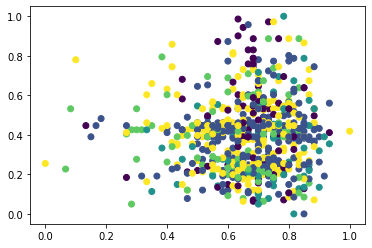

In [68]:
import matplotlib.pyplot as plt

rating_kmeans = KMeans(n_clusters=5, random_state=42)
rating_fit = rating_kmeans.fit_predict(rating_train.iloc[:, 3:11])
rating_predict = rating_kmeans.predict(rating_test.iloc[:, 3:11])

plt.scatter(rating_train.iloc[:, 11], rating_train.iloc[:, 3], c=rating_fit)
plt.show()

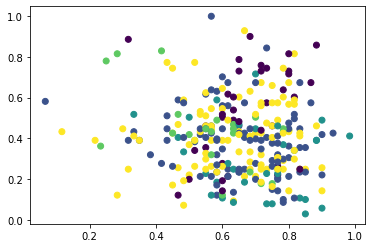

In [69]:
plt.scatter(rating_test.iloc[:, 11], rating_test.iloc[:, 3], c=rating_predict)
plt.show()

In [70]:
rating_train['rating'] = rating_fit.tolist()
rating_train.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict,rating
293,50 Ways to Say Goodbye,Train,dance pop,0.531915,0.956522,0.519481,0.882353,0.148148,0.752688,0.000000,0.058824,0.633333,93,1
460,Jealous - Remix,Nick Jonas,dance pop,0.198582,0.706522,0.636364,0.823529,0.518519,0.440860,0.010204,0.117647,0.600000,27,3
417,New Flame (feat. Usher & Rick Ross),Chris Brown,dance pop,0.546099,0.619565,0.662338,0.823529,0.098765,0.440860,0.051020,0.039216,0.633333,45,4
440,Don't Tell 'Em,Jeremih,chicago rap,0.234043,0.510870,0.870130,0.764706,0.111111,0.376344,0.397959,0.156863,0.750000,5,2
891,SICKO MODE,Travis Scott,hip hop,0.638298,0.728261,0.831169,0.823529,0.123457,0.440860,0.010204,0.392157,0.850000,56,0


In [71]:
rating_train_subset = rating_train[['title', 'rating']]
rating_train_subset.head()

,title,rating
293,50 Ways to Say Goodbye,1
460,Jealous - Remix,3
417,New Flame (feat. Usher & Rick Ross),4
440,Don't Tell 'Em,2
891,SICKO MODE,0


In [72]:
rating_test['rating'] = rating_predict.tolist()

In [73]:
rating_test_subset = rating_test[['title', 'rating']]
rating_test_subset.head()

,title,rating
897,If You're Over Me,1
343,Radioactive,3
287,I Knew You Were Trouble.,1
30,Whatcha Say,1
169,Midnight City,4


In [74]:
ratings = pd.concat([rating_train_subset, rating_test_subset])

In [75]:
len(ratings)

945

Data with ratings

In [76]:
df_subset_with_ratings = df_subset.merge(ratings)
len(df_subset_with_ratings)

945

In [77]:
df_subset_with_ratings.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict,rating
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,0.531915,0.815217,0.545455,0.705882,0.259259,0.204301,0.000000,0.078431,0.583333,88,4
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,0.517730,0.902174,0.636364,0.823529,0.419753,0.849462,0.010204,0.117647,0.550000,78,3
2,I Need A Dollar,Aloe Blacc,pop soul,0.212766,0.456522,0.844156,0.647059,0.086420,0.989247,0.204082,0.019608,0.616667,62,1
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,0.198582,0.880435,0.610390,0.823529,0.024691,0.365591,0.112245,0.196078,0.750000,87,4
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,0.276596,0.858696,0.649351,0.705882,0.086420,0.752688,0.397959,0.058824,0.733333,13,1


In [78]:
df_subset_with_ratings['rating'] = df_subset_with_ratings['rating'] + 1
df_subset_with_ratings.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict,rating
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,0.531915,0.815217,0.545455,0.705882,0.259259,0.204301,0.000000,0.078431,0.583333,88,5
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,0.517730,0.902174,0.636364,0.823529,0.419753,0.849462,0.010204,0.117647,0.550000,78,4
2,I Need A Dollar,Aloe Blacc,pop soul,0.212766,0.456522,0.844156,0.647059,0.086420,0.989247,0.204082,0.019608,0.616667,62,2
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,0.198582,0.880435,0.610390,0.823529,0.024691,0.365591,0.112245,0.196078,0.750000,87,5
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,0.276596,0.858696,0.649351,0.705882,0.086420,0.752688,0.397959,0.058824,0.733333,13,2


df_subset_with_ratings now has 1-5 "star" ratings for each song that has been generated by creating 5 clusters through k-means.

In [79]:
class Song_recommendation():
    def __init__(self, data):
        self.data = data
    
    def recommend_song(self, songs, amount=1):
    # recommend songs based on song title given by measuring the distance of the song (data point) from the clusters centroids
        distance = []
        song = self.data[(self.data.title.str.lower() == songs.lower())].head(1).values[0]
        rec = self.data[self.data.title.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            dis = 0
            for col in np.arange(len(rec.columns)):
                if not col in [0, 1, 2, 3, 14]:
                    dis = dis + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(dis)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        rec = rec[rec['rating'] >= 4]          # make sure songs produced have rating is at least 4
        columns = ['artist', 'title', 'top genre', 'rating']
        return rec[columns][:amount]

    def recommend_artist(self, artists, amount=1):
    # recommend artists and songs based on artist name given by measuring the distance of the data point from the clusters centroids
        distance = []
        artist = self.data[(self.data.artist.str.lower() == artists.lower())].head(1).values[0]
        rec = self.data[self.data.artist.str.lower() != artists.lower()]
        for artists in tqdm(rec.values):
            dis = 0
            for col in np.arange(len(rec.columns)):
                if not col in [0, 1, 2, 3, 14]:
                    dis = dis + np.absolute(float(artist[col]) - float(artists[col]))
            distance.append(dis)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        rec = rec[rec['rating'] >= 4]            # make sure songs produced have rating is at least 4
        columns = ['artist', 'title', 'top genre', 'rating']
        return rec[columns][:amount]

In [80]:
# Initialize recommendations
recommendations = Song_recommendation(df_subset_with_ratings)

In [81]:
recommendations.recommend_song("Over", 10)  # Canadian Hip Hop, Drake

100%|██████████| 944/944 [00:00<00:00, 25665.71it/s]


,artist,title,top genre,rating
390,Aloe Blacc,The Man,pop soul,5
568,X Ambassadors,Renegades,modern alternative rock,4
162,Lil Wayne,6 Foot 7 Foot,hip hop,4
508,Foals,Mountain at My Gates,indie rock,4
840,The Weeknd,Pray For Me (with Kendrick Lamar),canadian contemporary r&b,5
944,Young Thug,The London (feat. J. Cole & Travis Scott),atl hip hop,5
411,DJ Snake,Turn Down for What,dance pop,5
670,blackbear,do re mi,electropop,5
478,Tove Lo,Talking Body,art pop,5
834,Sigrid,Strangers,dance pop,5


In [82]:
recommendations.recommend_song("Animal", 10) # modern alternative rock, Neon Trees

100%|██████████| 944/944 [00:00<00:00, 28949.71it/s]


,artist,title,top genre,rating
300,Avril Lavigne,Here's to Never Growing Up,canadian pop,4
257,Neon Trees,Everybody Talks,modern alternative rock,4
153,Katy Perry,E.T.,dance pop,4
21,Ellie Goulding,Starry Eyed,dance pop,4
68,Scouting For Girls,This Ain't a Love Song,dance pop,4
169,Mac Miller,Donald Trump,hip hop,4
220,DJ Fresh,Hot Right Now - Edit,dancefloor dnb,5
113,Bruno Mars,Grenade,dance pop,5
667,Big Sean,Bounce Back,detroit hip hop,5
797,Imagine Dragons,Natural,modern rock,5


In [83]:
recommendations.recommend_song("Riverside", 10) # dutch house, Sidney Samson

100%|██████████| 944/944 [00:00<00:00, 25365.63it/s]


,artist,title,top genre,rating
647,Steve Aoki,Just Hold On,dance pop,5
571,Zedd,I Want You To Know,complextro,5
464,ScHoolboy Q,Man Of The Year,gangster rap,5
536,Philip George,Wish You Were Mine - Radio Edit,deep groove house,5
627,Marshmello,Alone,brostep,5
14,David Guetta,Gettin' Over You (feat. Fergie & LMFAO),big room,5
39,Katy Perry,California Gurls,dance pop,5
862,Ashley O,On A Roll,pop,5
718,Macklemore,Glorious (feat. Skylar Grey),pop rap,5
748,The Vamps,Middle Of The Night,boy band,5


In [84]:
recommendations.recommend_song("If I die young", 10) # contemporary country, the band perry

100%|██████████| 944/944 [00:00<00:00, 26427.51it/s]


,artist,title,top genre,rating
829,Post Malone,Better Now,dfw rap,5
520,Kygo,Nothing Left (feat. Will Heard),edm,5
613,James TW,When You Love Someone,neo mellow,5
634,Nick Jonas,Close,dance pop,5
905,Lil Nas X,Panini,lgbtq+ hip hop,5
208,Bruno Mars,It Will Rain,dance pop,5
114,Bruno Mars,Marry You,dance pop,5
894,Kehlani,Nights Like This (feat. Ty Dolla $ign),dance pop,5
823,NF,Let You Down,hip hop,5
465,Sheppard,Geronimo,australian indie,5


In [85]:
recommendations.recommend_song("mine", 10) # pop , taylor swift

100%|██████████| 944/944 [00:00<00:00, 29910.88it/s]


,artist,title,top genre,rating
508,Foals,Mountain at My Gates,indie rock,4
568,X Ambassadors,Renegades,modern alternative rock,4
162,Lil Wayne,6 Foot 7 Foot,hip hop,4
390,Aloe Blacc,The Man,pop soul,5
16,Drake,Over,canadian hip hop,5
478,Tove Lo,Talking Body,art pop,5
431,Kiesza,Hideaway,electropop,5
840,The Weeknd,Pray For Me (with Kendrick Lamar),canadian contemporary r&b,5
834,Sigrid,Strangers,dance pop,5
912,Marshmello,Here With Me,brostep,5


In [86]:
recommendations.recommend_song("Dynamite", 10) # dance pop, taio cruz

100%|██████████| 944/944 [00:00<00:00, 24862.94it/s]


,artist,title,top genre,rating
525,Major Lazer,Lean On,dance pop,4
217,David Guetta,Turn Me On (feat. Nicki Minaj),big room,4
6,Black Eyed Peas,The Time (Dirty Bit),dance pop,4
654,Timeflies,Once In a While,dance pop,4
59,Owl City,Fireflies,indietronica,5
796,Hugh Jackman,The Greatest Show,hollywood,5
170,Mann,Buzzin Remix,pop rap,4
318,CHVRCHES,The Mother We Share,electropop,5
82,The Script,For the First Time,celtic rock,5
412,DJ Snake,You Know You Like It,dance pop,5


In [87]:
recommendations.recommend_song("hard", 10) # barbarian pop, rihanna

100%|██████████| 944/944 [00:00<00:00, 19350.13it/s]


,artist,title,top genre,rating
275,Rudimental,Feel the Love (feat. John Newman),dance pop,4
437,Maroon 5,Animals,pop,4
710,Little Mix,Touch (feat. Kid Ink),dance pop,4
763,Banx & Ranx,Answerphone (feat. Yxng Bane),basshall,4
444,Nick Jonas,Jealous - Remix,dance pop,4
105,Beyoncé,Love On Top,dance pop,4
214,Cher Lloyd,Want U Back,dance pop,4
913,Marshmello,One Thing Right,brostep,4
908,Lizzo,Good as Hell,dance pop,4
22,Eminem,Love The Way You Lie,detroit hip hop,4


In [88]:
recommendations.recommend_song("bad romance", 10) # art pop by lady gaga

100%|██████████| 944/944 [00:00<00:00, 18006.46it/s]


,artist,title,top genre,rating
525,Major Lazer,Lean On,dance pop,4
217,David Guetta,Turn Me On (feat. Nicki Minaj),big room,4
6,Black Eyed Peas,The Time (Dirty Bit),dance pop,4
59,Owl City,Fireflies,indietronica,5
654,Timeflies,Once In a While,dance pop,4
796,Hugh Jackman,The Greatest Show,hollywood,5
170,Mann,Buzzin Remix,pop rap,4
318,CHVRCHES,The Mother We Share,electropop,5
82,The Script,For the First Time,celtic rock,5
412,DJ Snake,You Know You Like It,dance pop,5


In [89]:
recommendations.recommend_song("baby", 10) # canadian pop, justin beiber

100%|██████████| 944/944 [00:00<00:00, 17861.47it/s]


,artist,title,top genre,rating
170,Mann,Buzzin Remix,pop rap,4
59,Owl City,Fireflies,indietronica,5
796,Hugh Jackman,The Greatest Show,hollywood,5
851,21 Savage,a lot,atl hip hop,5
581,Beyoncé,Sorry,dance pop,5
97,Waka Flocka Flame,No Hands (feat. Roscoe Dash & Wale),atl hip hop,5
53,Ludacris,How Low,atl hip hop,5
412,DJ Snake,You Know You Like It,dance pop,5
396,Becky G,Shower,dance pop,5
318,CHVRCHES,The Mother We Share,electropop,5


In [90]:
recommendations.recommend_song("Memories (feat. Kid Cudi)", 15) # david guetta, big room

100%|██████████| 944/944 [00:00<00:00, 19718.44it/s]


,artist,title,top genre,rating
160,Lady Gaga,Born This Way,art pop,4
747,The Vamps,All Night,boy band,4
387,5 Seconds of Summer,She Looks So Perfect,boy band,4
203,Avicii,Levels - Radio Edit,dance pop,4
359,Mumford & Sons,I Will Wait,modern folk rock,4
570,Years & Years,King,dance pop,4
400,Calvin Harris,Blame (feat. John Newman),dance pop,4
409,David Guetta,Bad (feat. Vassy) - Radio Edit,big room,4
41,Kelly Rowland,Commander,atl hip hop,4
302,Baauer,Harlem Shake,bass trap,4


In [91]:
recommendations.recommend_song("rolling in the deep", 10) # british soul, adele

100%|██████████| 944/944 [00:00<00:00, 17564.49it/s]


,artist,title,top genre,rating
850,Zedd,The Middle,complextro,5
554,Taylor Swift,Wildest Dreams,pop,5
429,Katy Perry,Dark Horse,dance pop,5
200,alt-J,Breezeblocks,indie rock,5
163,Lil Wayne,How To Love,hip hop,5
733,Post Malone,I Fall Apart,dfw rap,5
760,Ariana Grande,God is a woman,dance pop,5
693,Hayden James,NUMB,aussietronica,5
397,Beyoncé,Drunk in Love (feat. Jay-Z),dance pop,5
917,Miley Cyrus,Slide Away,dance pop,5


In [92]:
recommendations.recommend_artist("Taylor Swift", 10) # pop

100%|██████████| 927/927 [00:00<00:00, 16069.47it/s]


,artist,title,top genre,rating
578,Ariana Grande,Dangerous Woman,dance pop,5
839,The Weeknd,Call Out My Name,canadian contemporary r&b,5
628,Martin Garrix,In the Name of Love,dance pop,5
707,Lil Peep,Save That Shit,emo rap,5
777,Dennis Lloyd,Nevermind,israeli pop,5
636,OneRepublic,Wherever I Go,dance pop,5
85,Timbaland,Carry Out (Featuring Justin Timberlake),dance pop,5
168,M83,Midnight City,french shoegaze,5
493,Demi Lovato,Cool for the Summer,dance pop,5
125,Coldplay,Every Teardrop Is a Waterfall,permanent wave,5


In [93]:
recommendations.recommend_artist("Maroon 5", 10) # pop

100%|██████████| 934/934 [00:00<00:00, 17759.02it/s]


,artist,title,top genre,rating
464,ScHoolboy Q,Man Of The Year,gangster rap,5
536,Philip George,Wish You Were Mine - Radio Edit,deep groove house,5
718,Macklemore,Glorious (feat. Skylar Grey),pop rap,5
809,Logic,Everyday,conscious hip hop,5
39,Katy Perry,California Gurls,dance pop,5
192,The Wanted,Glad You Came,boy band,5
571,Zedd,I Want You To Know,complextro,5
481,Zedd,Stay The Night - Featuring Hayley Williams Of ...,complextro,5
627,Marshmello,Alone,brostep,5
748,The Vamps,Middle Of The Night,boy band,5


In [94]:
recommendations.recommend_artist("Sara Bareilles", 10) # acoustic pop

100%|██████████| 944/944 [00:00<00:00, 20077.90it/s]


,artist,title,top genre,rating
35,JAY-Z,Young Forever,east coast hip hop,5
927,Post Malone,Goodbyes (feat. Young Thug),dfw rap,5
570,Years & Years,King,dance pop,4
747,The Vamps,All Night,boy band,4
359,Mumford & Sons,I Will Wait,modern folk rock,4
160,Lady Gaga,Born This Way,art pop,4
203,Avicii,Levels - Radio Edit,dance pop,4
409,David Guetta,Bad (feat. Vassy) - Radio Edit,big room,4
302,Baauer,Harlem Shake,bass trap,4
41,Kelly Rowland,Commander,atl hip hop,4


In [95]:
recommendations.recommend_artist("Ellie Goulding", 10) # dance pop

100%|██████████| 941/941 [00:00<00:00, 18926.33it/s]


,artist,title,top genre,rating
68,Scouting For Girls,This Ain't a Love Song,dance pop,4
58,Neon Trees,Animal,modern alternative rock,4
300,Avril Lavigne,Here's to Never Growing Up,canadian pop,4
257,Neon Trees,Everybody Talks,modern alternative rock,4
153,Katy Perry,E.T.,dance pop,4
169,Mac Miller,Donald Trump,hip hop,4
220,DJ Fresh,Hot Right Now - Edit,dancefloor dnb,5
656,Tove Lo,Cool Girl,art pop,5
113,Bruno Mars,Grenade,dance pop,5
714,Lorde,"Homemade Dynamite (Feat. Khalid, Post Malone &...",art pop,5


In [96]:
recommendations.recommend_song("Who's That Chick? (feat. Rihanna)", 10) # big room, david guetta

100%|██████████| 944/944 [00:00<00:00, 28919.26it/s]


,artist,title,top genre,rating
779,Drake,God's Plan,canadian hip hop,4
786,Ella Mai,Trip,dance pop,5
340,Justin Timberlake,Mirrors,dance pop,5
248,Lana Del Rey,Born To Die,art pop,5
296,Arctic Monkeys,Do I Wanna Know?,garage rock,5
503,Fetty Wap,679 (feat. Remy Boyz),new jersey rap,4
621,Lil Wayne,"Sucker for Pain (with Wiz Khalifa, Imagine Dra...",hip hop,4
634,Nick Jonas,Close,dance pop,5
905,Lil Nas X,Panini,lgbtq+ hip hop,5
465,Sheppard,Geronimo,australian indie,5


In [97]:
recommendations.recommend_song("Every Teardrop Is a Waterfall", 10) # coldplay, permanent wave

100%|██████████| 944/944 [00:00<00:00, 29912.69it/s]


,artist,title,top genre,rating
168,M83,Midnight City,french shoegaze,5
493,Demi Lovato,Cool for the Summer,dance pop,5
362,Of Monsters and Men,Little Talks,folk-pop,5
392,Ariana Grande,Love Me Harder,dance pop,5
636,OneRepublic,Wherever I Go,dance pop,5
530,Mumford & Sons,Believe,modern folk rock,5
85,Timbaland,Carry Out (Featuring Justin Timberlake),dance pop,5
589,Cheat Codes,Sex,dance pop,5
78,Taylor Swift,Back To December,pop,5
578,Ariana Grande,Dangerous Woman,dance pop,5


In [98]:
recommendations.recommend_song("bad at love", 15) # halsey

100%|██████████| 944/944 [00:00<00:00, 20493.48it/s]


,artist,title,top genre,rating
573,Adele,Send My Love (To Your New Lover),british soul,5
319,Ciara,Body Party,dance pop,4
231,Grimes,Oblivion,art pop,5
175,Noah And The Whale,L.I.F.E.G.O.E.S.O.N.,indie folk,4
578,Ariana Grande,Dangerous Woman,dance pop,5
78,Taylor Swift,Back To December,pop,5
839,The Weeknd,Call Out My Name,canadian contemporary r&b,5
628,Martin Garrix,In the Name of Love,dance pop,5
648,The 1975,Somebody Else,modern alternative rock,5
707,Lil Peep,Save That Shit,emo rap,5


In [99]:
recommendations.recommend_artist("Rihanna", 10) # barbadian pop

100%|██████████| 933/933 [00:00<00:00, 23672.26it/s]


,artist,title,top genre,rating
231,Grimes,Oblivion,art pop,5
573,Adele,Send My Love (To Your New Lover),british soul,5
319,Ciara,Body Party,dance pop,4
175,Noah And The Whale,L.I.F.E.G.O.E.S.O.N.,indie folk,4
578,Ariana Grande,Dangerous Woman,dance pop,5
78,Taylor Swift,Back To December,pop,5
839,The Weeknd,Call Out My Name,canadian contemporary r&b,5
628,Martin Garrix,In the Name of Love,dance pop,5
707,Lil Peep,Save That Shit,emo rap,5
777,Dennis Lloyd,Nevermind,israeli pop,5
